# Imports

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from utils import print_tensor_like_image



/home/aditya/miniconda3/envs/QCNet/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/aditya/miniconda3/envs/QCNet/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


__________________________________
# 2. DATALOADER 
________________________

# PyTorch `DataLoader`

The `DataLoader` in PyTorch is a versatile tool designed to streamline data management during model training and evaluation. It provides several key features that enhance the efficiency and flexibility of data handling:

- **Batching**: Automatically groups data into batches, reducing memory overhead and speeding up computation.
- **Shuffling**: Randomly shuffles the data at the beginning of each epoch to improve model generalization.
- **Parallel Data Loading**: Utilizes multiple CPU cores to load data concurrently, accelerating the data preparation process.
- **Custom Collate Functions**: Allows customization of how data samples are combined into batches, accommodating various data formats.
- **Memory Pinning**: Enables faster data transfer between CPU and GPU by using pinned memory.

These features collectively ensure efficient data processing, allowing for smoother and faster training of machine learning models.


### 2.1 Making Dataloader

In [2]:
# 1. Data Loading and Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize data
])

# Download and load training d
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

# Download and load test data # NOTE : No need to shuffle
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

__________________________________
# 2. BATCHING
________________________

**Batching** in PyTorch groups data samples into manageable chunks for efficient processing.

### How Batching Works

1. **Batch Size**: Specified in the `DataLoader` to define the number of samples per batch.
2. **DataLoader**: Automatically creates and yields batches, improving training speed and resource use.
3. **Efficiency**: Reduces processing overhead and leverages parallel hardware.
4. **Memory**: Manages memory by loading data in chunks.

Batching optimizes data handling, making training more efficient.


### 2.1 Disecting a single BATCH

In [3]:
for batch in trainloader:
    X, y = batch
    # TRAINING CODE HERE .....
    break

In [4]:
X.shape, y.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [5]:
image_idx = 10

In [6]:
print_tensor_like_image(X[image_idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.263,-0.145,-0.145,1.000,0.655,-0.145,-0.145,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.263,0.937,0.976,0.976,0.984,0.976,0.976,0.976,0.224,-0.592,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.263,0.851,0.686,0.686,0.702,0.686,0.890,0.976,0.984,0.404,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.514,-1.000,-1.000,-1.000,-1.000,-0.231,0.976,0.984,0.404,-0.992,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


LABEL : 3


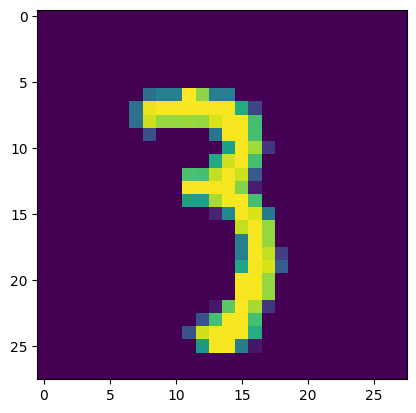

In [7]:
print(f'LABEL : {y[image_idx]}')
plt.imshow(X[image_idx].squeeze()) 
plt.show()

### 2.2 SOME CONFUSING BUT IMPORTANT TERMS

### Forward Pass
A **Forward Pass** involves passing input data through the model to generate predictions. Each layer processes the input based on current weights to compute the output.

### Epoch
An **Epoch** is one complete pass through the entire training dataset. The model processes all samples once, and multiple epochs are used to iteratively improve the model’s performance.

### Step
A **Step** is a single update of the model’s parameters, occurring after processing a batch of data. Each epoch consists of multiple steps, corresponding to the number of batches.

### Summary
- **Forward Pass**: Computes model predictions for input data.
- **Epoch**: One full iteration over the entire dataset.
- **Step**: A single update of the model’s parameters after a batch.


In [9]:
from utils import Net
model = Net()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, shuffle=True, num_workers=2)
NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
    
    print(f"\n\nEPOCH : {epoch+1} STARTED TRAINING \n")
    
    for idx, batch in enumerate(trainloader):
        
        X, y = batch
        out = model(X)
        # Some more code ....
        
        print(f'BATCH : {idx + 1} DONE , BATCH X SHAPE : {batch[0].shape} ', end=' | ')
        
    




EPOCH : 1 STARTED TRAINING 

BATCH : 1 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 2 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 3 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 4 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 5 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 6 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 7 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 8 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 9 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 10 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 11 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 12 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 13 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 14 DONE , BATCH X SHAPE : torch.Size([1024, 1, 28, 28])  | BATCH : 15 DONE , BATCH X SHAPE : torch.

__________________________________
# THANK YOU
________________________